Author: S M Abdullah ferdous

Module:Data Mining and visualisation

Topic: Nuclear reactor data analysis and status prediction

University of Aberdeen ,2020


### **Creating Apache spark enviroment**

In [1]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "11.0.6" 2020-01-14
OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1)
OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)


In [0]:
#install the dependencies
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz

In [0]:
#install the dependencies
!tar xf spark-2.4.5-bin-hadoop2.7.tgz

In [0]:
#install the dependencies
!pip install -q findspark

In [0]:
#setting up apcahe spark enviroment variable
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

In [0]:
#intialiseing findspark
import findspark
findspark.init()

In [0]:
#creating the spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Learning_Spark") \
    .getOrCreate()

In [8]:
#doing the imports
import pandas as pd
import string
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.ml.feature import VectorAssembler, StringIndexer, StandardScaler
from pyspark.ml.classification import LogisticRegression, GBTClassifier
from pyspark.sql.types import *
from pyspark.sql.functions import isnan, when, count, col
from pyspark.mllib.evaluation import BinaryClassificationMetrics, MulticlassMetrics
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**File upload and intial data Investigation with spark and Pandas**

In [10]:
#File upload
from google.colab import files
files.upload()

Saving CS551G_Assesment_two_Ferdous_SM_Abdullah_519872224.docx to CS551G_Assesment_two_Ferdous_SM_Abdullah_519872224.docx


{'CS551G_Assesment_two_Ferdous_SM_Abdullah_519872224.docx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00\xc0\xfd\xa0!\xa4\x01\x00\x00\xe8\x08\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

In [0]:
#reading the csv file into spark with spark.read command
data = spark.read.csv('DMV_CS551G_Assignment 2-dataset-nuclear_plants.csv',inferSchema=True, header=True)

In [90]:
#counting the data
data.count(), len(data.columns)

(996, 13)

In [91]:
#overview of the data
data.show(5)

+------+--------------------+--------------------+---------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|Status|Power_range_sensor_1|Power_range_sensor_2|Power_range_sensor_3 |Power_range_sensor_4|Pressure _sensor_1|Pressure _sensor_2|Pressure _sensor_3|Pressure _sensor_4|Vibration_sensor_1|Vibration_sensor_2|Vibration_sensor_3|Vibration_sensor_4|
+------+--------------------+--------------------+---------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|Normal|              4.5044|              0.7443|                 6.34|              1.9052|           29.5315|            0.8647|            2.2044|             6.048|           14.4659|            21.648|           15.3429|            1.2186|
|Normal|        

In [92]:
#printing the data schema
data.printSchema()

root
 |-- Status: string (nullable = true)
 |-- Power_range_sensor_1: double (nullable = true)
 |-- Power_range_sensor_2: double (nullable = true)
 |-- Power_range_sensor_3 : double (nullable = true)
 |-- Power_range_sensor_4: double (nullable = true)
 |-- Pressure _sensor_1: double (nullable = true)
 |-- Pressure _sensor_2: double (nullable = true)
 |-- Pressure _sensor_3: double (nullable = true)
 |-- Pressure _sensor_4: double (nullable = true)
 |-- Vibration_sensor_1: double (nullable = true)
 |-- Vibration_sensor_2: double (nullable = true)
 |-- Vibration_sensor_3: double (nullable = true)
 |-- Vibration_sensor_4: double (nullable = true)



In [93]:
#checking the dataset details with pandas
#imporing the dataset with pandas daraframe
df = pd.read_csv('DMV_CS551G_Assignment 2-dataset-nuclear_plants.csv')
#dropping the class label as it will not be the part of this section of the investigation
#taking the backup of the full dataset to be used later for plots nr=necluar reactor
df_nr=df
df = df.drop('Status' ,axis=1)
#printing the first five rows of the dataset
df.head()


Power_range_sensor_1  ...  Vibration_sensor_4
0                4.5044  ...              1.2186
1                4.4284  ...              7.3483
2                4.5291  ...              9.2408
3                5.1727  ...              4.0157
4                5.2258  ...             13.4966

[5 rows x 12 columns]

In [94]:
#Checking for empty values
print ("Empty values: {}.".format(df.isnull().values.any()))

Empty values: False.


In [95]:
#we can also check for null values like this
df.isnull().sum()

Power_range_sensor_1     0
Power_range_sensor_2     0
Power_range_sensor_3     0
Power_range_sensor_4     0
Pressure _sensor_1       0
Pressure _sensor_2       0
Pressure _sensor_3       0
Pressure _sensor_4       0
Vibration_sensor_1       0
Vibration_sensor_2       0
Vibration_sensor_3       0
Vibration_sensor_4       0
dtype: int64

In [96]:
#getting various information about the dataset.Such as Mean,Average,STD
df.describe()

Power_range_sensor_1  ...  Vibration_sensor_4
count            996.000000  ...          996.000000
mean               4.999574  ...            9.933591
std                2.764856  ...            7.282383
min                0.008200  ...            0.009200
25%                2.892120  ...            3.842675
50%                4.881100  ...            8.853050
75%                6.794557  ...           14.357400
max               12.129800  ...           43.231400

[8 rows x 12 columns]

In [97]:
df.mean()

Power_range_sensor_1      4.999574
Power_range_sensor_2      6.379273
Power_range_sensor_3      9.228112
Power_range_sensor_4      7.355272
Pressure _sensor_1       14.199127
Pressure _sensor_2        3.077958
Pressure _sensor_3        5.749234
Pressure _sensor_4        4.997002
Vibration_sensor_1        8.164563
Vibration_sensor_2       10.001593
Vibration_sensor_3       15.187982
Vibration_sensor_4        9.933591
dtype: float64

In [98]:
df.median()

Power_range_sensor_1      4.881100
Power_range_sensor_2      6.470500
Power_range_sensor_3      9.348000
Power_range_sensor_4      7.071550
Pressure _sensor_1       11.716802
Pressure _sensor_2        2.672400
Pressure _sensor_3        5.741357
Pressure _sensor_4        3.859200
Vibration_sensor_1        6.752900
Vibration_sensor_2        8.793050
Vibration_sensor_3       12.185650
Vibration_sensor_4        8.853050
dtype: float64

**checking the dataset for outliers and visualise them**

In [99]:
#we can calcuate the ouliers for the dataset
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
cwo=((df.iloc[:] <(q1-1.5*IQR))|(df.iloc[:]>(q3+1.5*IQR))).sum(axis=0)
opdf=pd.DataFrame(cwo,index=df.columns,columns=['No. of Outliers'])
opdf['Percentage Outliers']=round(opdf['No. of Outliers']*100/len(df),2)
opdf

No. of Outliers  Percentage Outliers
Power_range_sensor_1                 0                 0.00
Power_range_sensor_2                 1                 0.10
Power_range_sensor_3                 0                 0.00
Power_range_sensor_4                 0                 0.00
Pressure _sensor_1                  30                 3.01
Pressure _sensor_2                   4                 0.40
Pressure _sensor_3                   0                 0.00
Pressure _sensor_4                   0                 0.00
Vibration_sensor_1                  22                 2.21
Vibration_sensor_2                  10                 1.00
Vibration_sensor_3                  22                 2.21
Vibration_sensor_4                  13                 1.31

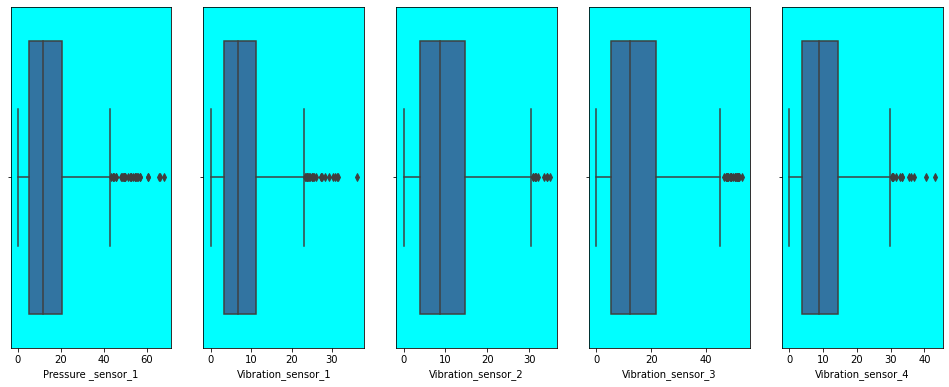

In [100]:
#Visualise the outliers in Pressure _sensor_1,Vibration_sensor_1,Vibration_sensor_2,Vibration_sensor_3,Vibration_sensor_4
from matplotlib import pyplot
a4_dims = (16.7, 6.27)
fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(ncols=5,figsize=a4_dims, sharey=True)
sns.boxplot(x=df['Pressure _sensor_1'],ax=ax1)
sns.boxplot(x=df['Vibration_sensor_1'],ax=ax2)
sns.boxplot(x=df['Vibration_sensor_2'],ax=ax3)
sns.boxplot(x=df['Vibration_sensor_3'],ax=ax4)
sns.boxplot(x=df['Vibration_sensor_4'],ax=ax5)
plt.rcParams['axes.facecolor'] = 'aqua'


## **Data visualisation**

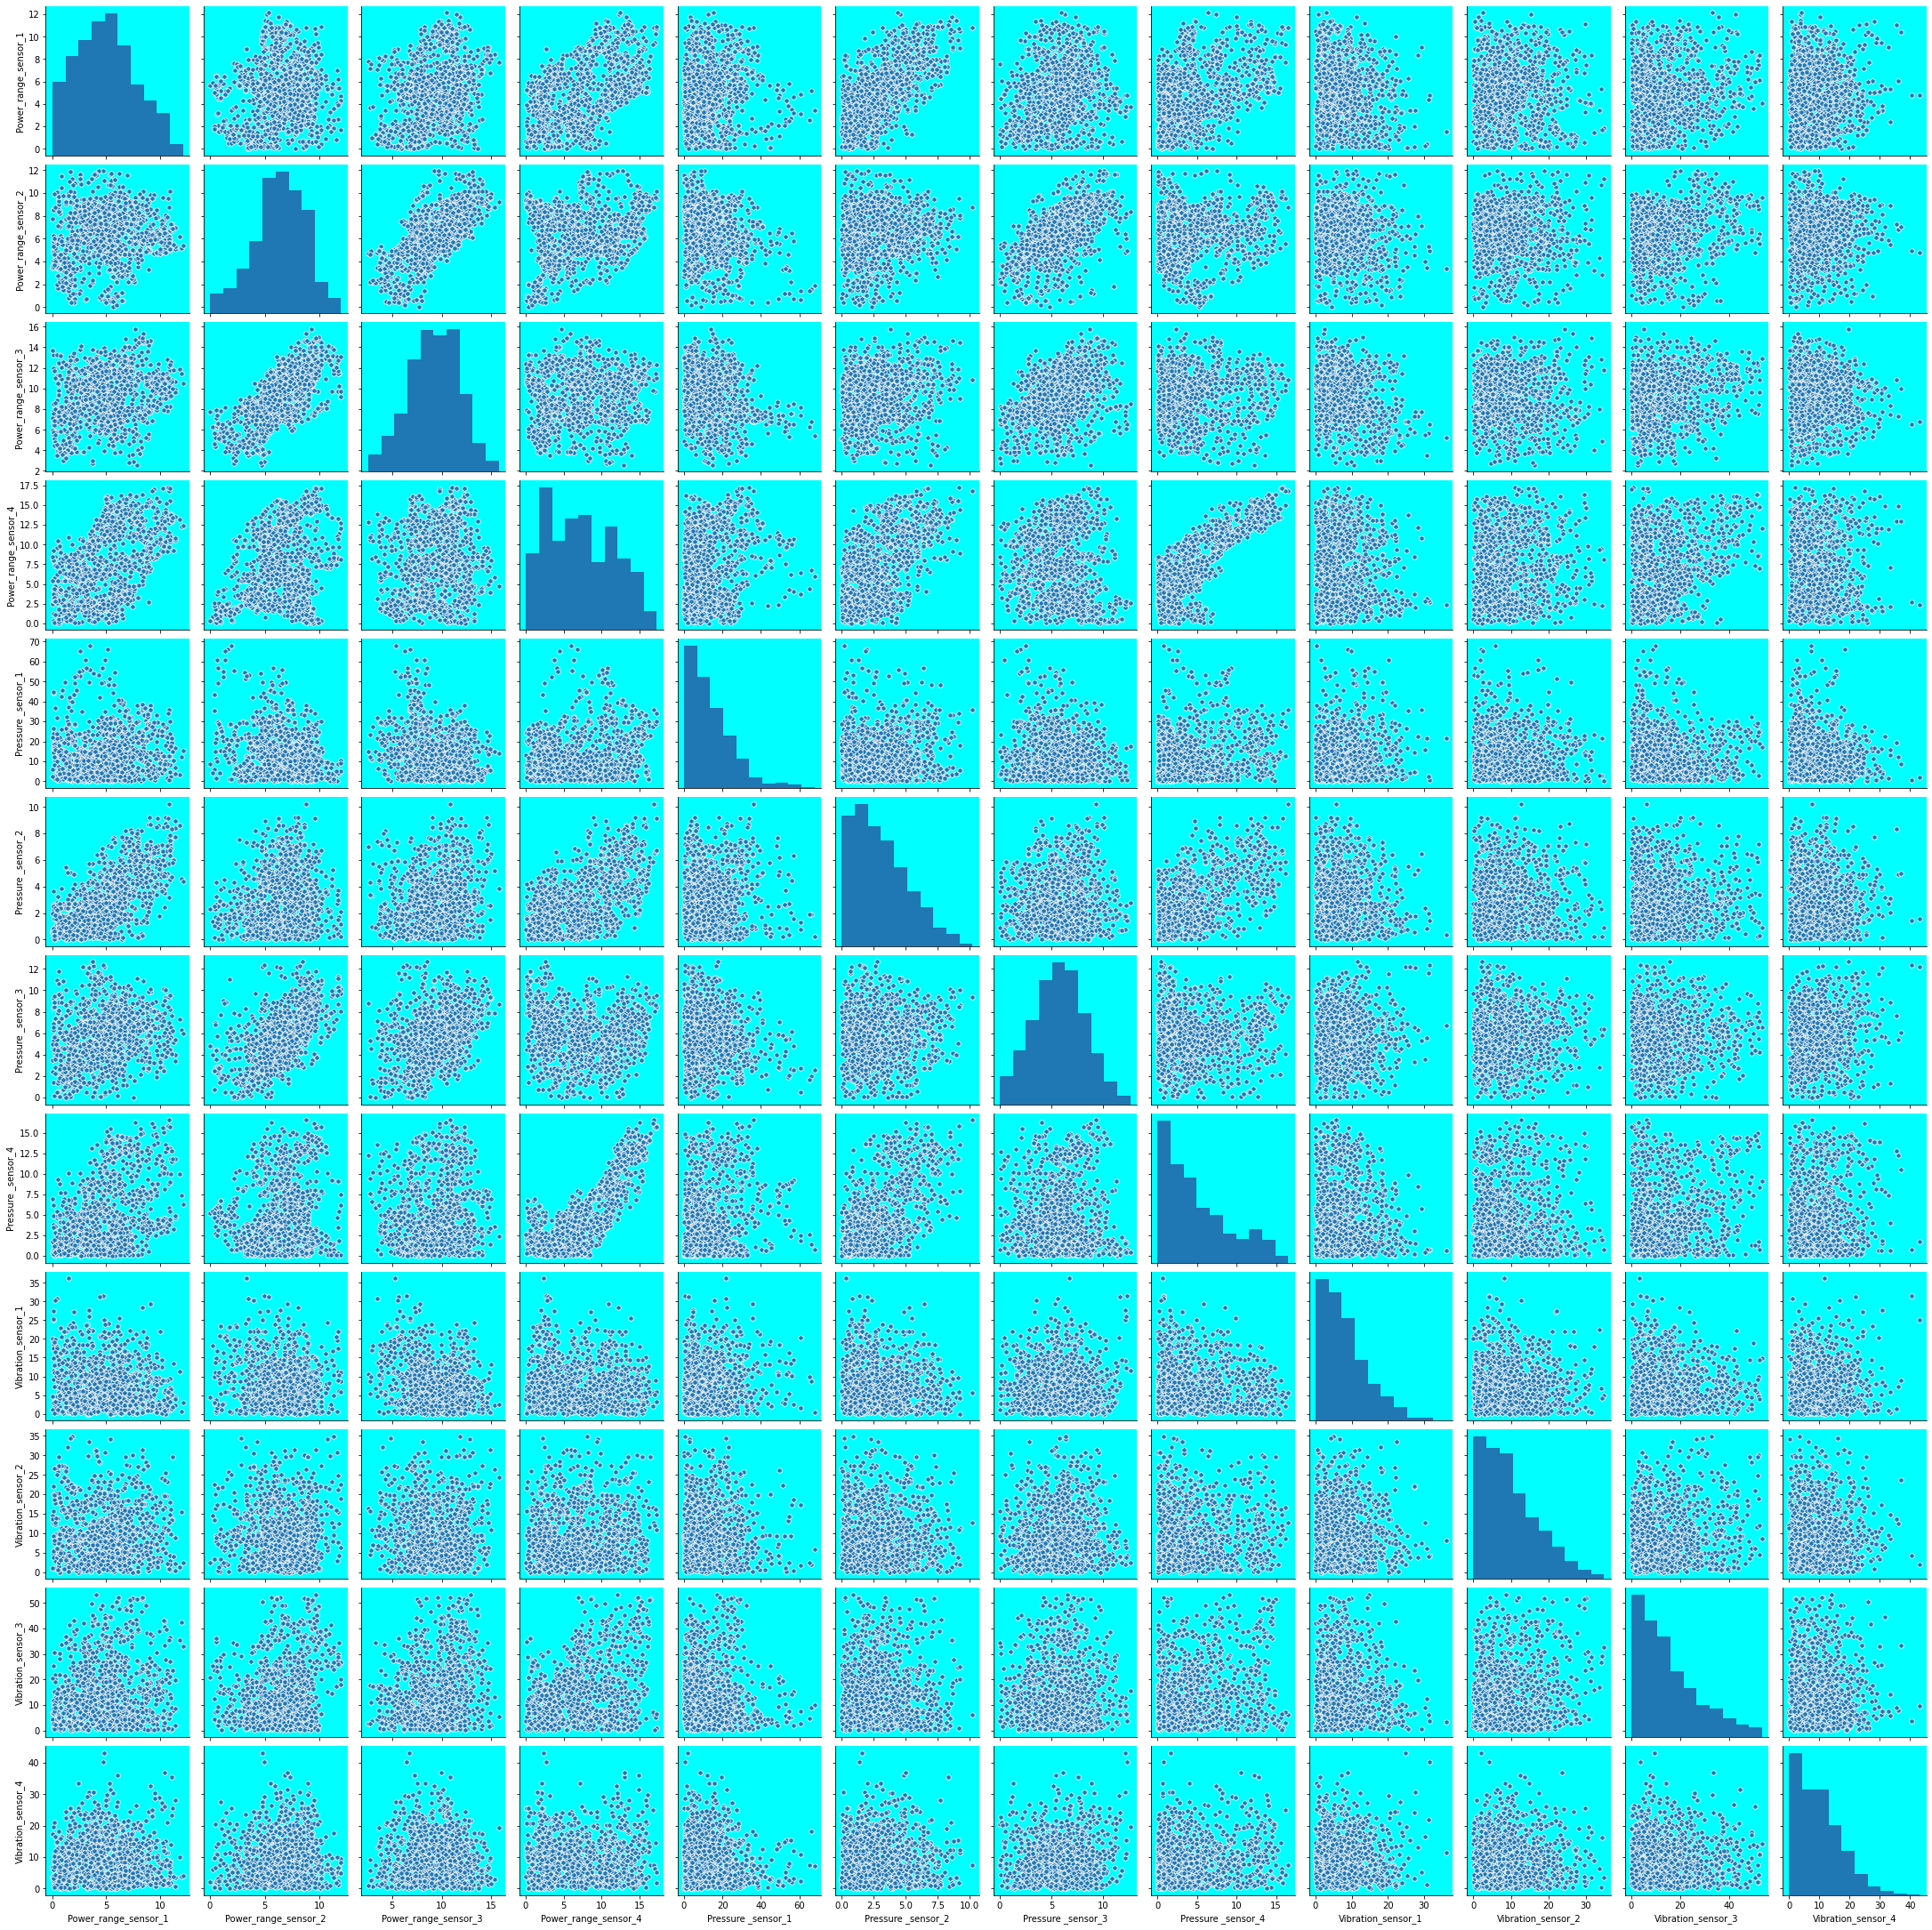

In [101]:
#we can see the relationship between the variables unsing the complete
sns.pairplot(df_nr,markers="h")
plt.rcParams['axes.facecolor'] = 'aqua'
plt.show()

In [102]:
#count data labels
pd.value_counts(df_nr['Status'])


Abnormal    498
Normal      498
Name: Status, dtype: int64

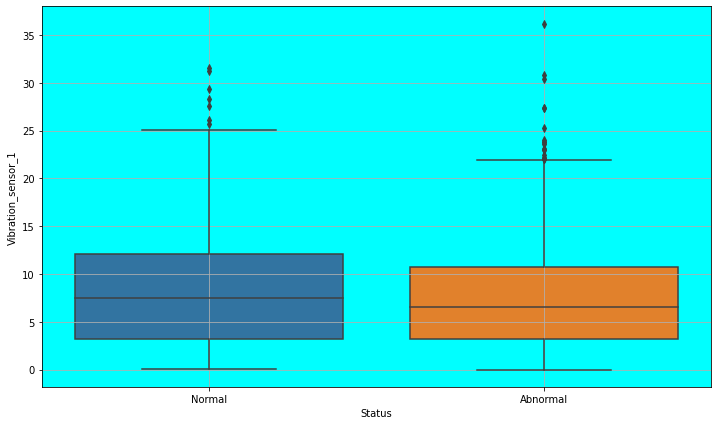

In [103]:
#box plot of class label and Vibration_sensor_1
dims = (12, 7)
fig, (ax1) = plt.subplots(ncols=1,figsize=dims, sharey=True)
sns.boxplot(x=df_nr["Status"], y=df_nr["Vibration_sensor_1"], data=df_nr, ax=ax1)
plt.rcParams['axes.facecolor'] = 'aqua'
plt.grid()
plt.show()



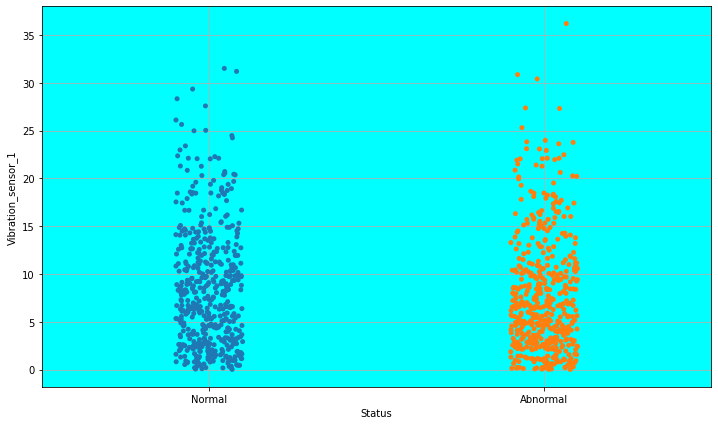

In [104]:
#we can do a stripplot for better understanding of class distribution againt vibration sensor one
dims = (12, 7)
fig, (ax1) = plt.subplots(ncols=1,figsize=dims, sharey=True)
sns.stripplot(x=df_nr["Status"], y=df_nr["Vibration_sensor_1"], data=df_nr, ax=ax1)
plt.grid()
plt.rcParams['axes.facecolor'] = 'aqua'
plt.show()

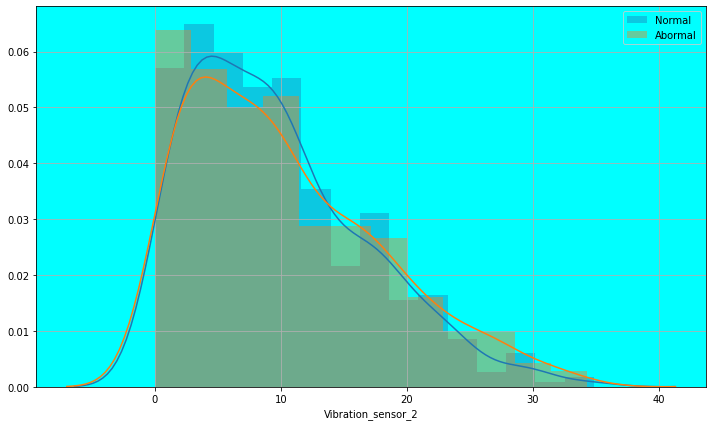

In [105]:
#taking the class labels into a separate df.we can use the new df or we can directly give to the plot
#df_normal_class=df[df['Status'] == 'Normal']
#df_Abnormal_class=df[df['Status'] == 'Abnormal']
dims = (12, 7)
fig, (ax1) = plt.subplots(ncols=1,figsize=dims, sharey=True)
sns.distplot(df_nr[df_nr['Status'] == 'Normal']["Vibration_sensor_2"],ax=ax1,label='Normal')
sns.distplot(df_nr[df_nr['Status'] == 'Abnormal']["Vibration_sensor_2"],ax=ax1,label='Abormal')
plt.legend()
plt.grid()
plt.rcParams['axes.facecolor'] = 'aqua'
plt.show()

**Prepareing the data**



In [0]:
#taking the data labels a separate variable
data_label = data.select('Status')
#data_label.show(10)

In [0]:
#we have to change/encode the  value of the label into 0 and 1
encoder = StringIndexer(inputCol="Status", outputCol="Class_label")
data = encoder.fit(data).transform(data)
data=data.withColumn("Class_label",col("Class_label").cast("Integer"))

In [108]:
#dropping the original status clumn
data = data.drop("Status")
#data = data.drop("class_label")
data.show()

+--------------------+--------------------+---------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------+
|Power_range_sensor_1|Power_range_sensor_2|Power_range_sensor_3 |Power_range_sensor_4|Pressure _sensor_1|Pressure _sensor_2|Pressure _sensor_3|Pressure _sensor_4|Vibration_sensor_1|Vibration_sensor_2|Vibration_sensor_3|Vibration_sensor_4|Class_label|
+--------------------+--------------------+---------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------+
|              4.5044|              0.7443|                 6.34|              1.9052|           29.5315|            0.8647|            2.2044|             6.048|           14.4659|            21.648|           15.3429|            1.2186|         

In [109]:
#useing vector assembler scale the features and creat model data
from pyspark.ml.feature import VectorAssembler
inputcols = inputCols=data.columns[0:-1]

assembler = VectorAssembler(inputCols= inputcols,outputCol = "predictors")

predictors = assembler.transform(data)

predictors.columns

['Power_range_sensor_1',
 'Power_range_sensor_2',
 'Power_range_sensor_3 ',
 'Power_range_sensor_4',
 'Pressure _sensor_1',
 'Pressure _sensor_2',
 'Pressure _sensor_3',
 'Pressure _sensor_4',
 'Vibration_sensor_1',
 'Vibration_sensor_2',
 'Vibration_sensor_3',
 'Vibration_sensor_4',
 'Class_label',
 'predictors']

In [0]:
#seale the data
scaler = StandardScaler(inputCol="predictors", outputCol="scaled_predictors")
predictors = scaler.fit(predictors).transform(predictors)

**Building Logistic regression model**

In [111]:
model_data = predictors.select("scaled_predictors", "class_label")
model_data.show(5,truncate=False)

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------+
|scaled_predictors                                                                                                                                                                                                                     |class_label|
+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------+
|[1.6291628873564028,0.3218498836751728,2.5037784832143863,0.43749645121071834,2.528372025260846,0.40670884635362786,0.8726372195279792,1.4519300446321306,2.3433156436349054,2.9508333396982045,1.2617905837428387,0.167335327638901] |0          |
|[1.6016750134022497

In [112]:
#creating test and train split
train_data,test_data = model_data.randomSplit([0.75,0.25])
print("Number of train data",train_data.count())
print("Number of train data",test_data.count())

Number of train data 740
Number of train data 256


In [113]:
train_data.show(5)


+--------------------+-----------+
|   scaled_predictors|class_label|
+--------------------+-----------+
|[0.00296579692663...|          1|
|[0.01383435761508...|          1|
|[0.01425029254991...|          1|
|[0.03114086772963...|          0|
|[0.03917890076591...|          1|
+--------------------+-----------+
only showing top 5 rows



In [114]:
test_data.show(5)

+--------------------+-----------+
|   scaled_predictors|class_label|
+--------------------+-----------+
|[0.03077918517761...|          0|
|[0.04604218887320...|          1|
|[0.04998452869031...|          0|
|[0.05233546527849...|          0|
|[0.05859257342858...|          1|
+--------------------+-----------+
only showing top 5 rows



**Building Logistic regression model**

In [0]:
lr = LogisticRegression(featuresCol="scaled_predictors",labelCol="class_label")
lrModel = lr.fit(train_data)

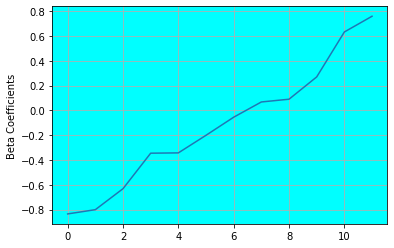

In [116]:
#checking the coeeficient of the model
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.grid()
plt.rcParams['axes.facecolor'] = 'aqua'
plt.show()

**Reporting the models performance**

In [0]:
trainingSummary = lrModel.summary
#making prediction on test data
predictions_train = lrModel.transform(train_data)
predictions = lrModel.transform(test_data)

In [118]:
#checking the auuracy matrix
accuracy_evaluator = MulticlassClassificationEvaluator( labelCol="class_label",metricName="accuracy")
accuracy_on_test = accuracy_evaluator.evaluate(predictions)
print("The accuracy of the model is :" ,accuracy_on_test )

The accuracy of the model is : 0.7421875


In [119]:
#area under the curve
Auc_evaluator = BinaryClassificationEvaluator( labelCol="class_label",metricName="areaUnderROC")
auc_on_test= Auc_evaluator.evaluate(predictions)
print('Test Area Under ROC/test set Auc :' , auc_on_test)

Test Area Under ROC/test set Auc : 0.8199836919024016


In [120]:
#evaluating the precision
precision_evaluator = MulticlassClassificationEvaluator(metricName='weightedPrecision', labelCol='class_label')
precision_on_test= precision_evaluator.evaluate(predictions)
print('precision on test set :' , precision_on_test)

precision on test set : 0.7608001520569716


In [121]:
#evaluating the recall peformance
recall_evaluator = MulticlassClassificationEvaluator(metricName='weightedRecall', labelCol='class_label')
recall_on_test= recall_evaluator.evaluate(predictions)
print('recall on test set :' , recall_on_test)

recall on test set : 0.7421875


**building Gradient-boosted tree classifier**

In [0]:
gbtc = GBTClassifier(labelCol="class_label", featuresCol="scaled_predictors")
gbtc_Model = gbtc.fit(train_data)


Gradient-boosted tree classifier Models performance evaluation

In [0]:
#making prediction on test data
predictions_train_gbtc = gbtc_Model.transform(train_data)
predictions_gbtc = gbtc_Model.transform(test_data)

In [124]:
#checking the auuracy matrix
accuracy_evaluator_gbtc = MulticlassClassificationEvaluator( labelCol="class_label",metricName="accuracy")
accuracy_on_test_gbtc = accuracy_evaluator_gbtc.evaluate(predictions_gbtc)
print("The accuracy of the Gradient-boosting tree model is:" ,accuracy_on_test_gbtc )

The accuracy of the Gradient-boosting tree model is: 0.88671875


In [125]:
#area under the curve
Auc_evaluator_gbtc = BinaryClassificationEvaluator( labelCol="class_label",metricName="areaUnderROC")
auc_on_test_gbtc= Auc_evaluator_gbtc.evaluate(predictions_gbtc)
print('Test Area Under ROC/test set Auc for Gradient-boosting tree model :' , auc_on_test_gbtc)

Test Area Under ROC/test set Auc for Gradient-boosting tree model : 0.9522674528006025


In [126]:
#evaluating the precision
precision_evaluator_gbtc = MulticlassClassificationEvaluator(metricName='weightedPrecision', labelCol='class_label')
precision_on_test_gbtc= precision_evaluator.evaluate(predictions_gbtc)
print('precision on test set for Gradient-boosting tree model:' , precision_on_test_gbtc)

precision on test set for Gradient-boosting tree model: 0.886891774587087


In [127]:
#evaluating the recall peformance
recall_evaluator_gbtc  = MulticlassClassificationEvaluator(metricName='weightedRecall', labelCol='class_label')
recall_on_test_gbtc = recall_evaluator.evaluate(predictions_gbtc)
print('recall on test set for Gradient-boosting tree model :' , recall_on_test_gbtc )

recall on test set for Gradient-boosting tree model : 0.88671875
